<a href="https://colab.research.google.com/github/jawadkhanubit/Smart-Assistant-for-Dumb-And-Deaf/blob/master/SmartAssistantForDumb%26Deaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Uploading the Data Sete on Colab

In [0]:
from google.colab import files
uploaded = files.upload()

!unzip /content/DataSet.zip

Saving DataSet.zip to DataSet.zip
Archive:  /content/DataSet.zip
   creating: TrainingSet/I feel pain/
  inflating: TrainingSet/I feel pain/1.png  
  inflating: TrainingSet/I feel pain/10.png  
  inflating: TrainingSet/I feel pain/100.png  
  inflating: TrainingSet/I feel pain/11.png  
  inflating: TrainingSet/I feel pain/12.png  
  inflating: TrainingSet/I feel pain/13.png  
  inflating: TrainingSet/I feel pain/14.png  
  inflating: TrainingSet/I feel pain/15.png  
  inflating: TrainingSet/I feel pain/16.png  
  inflating: TrainingSet/I feel pain/17.png  
  inflating: TrainingSet/I feel pain/18.png  
  inflating: TrainingSet/I feel pain/19.png  
  inflating: TrainingSet/I feel pain/2.png  
  inflating: TrainingSet/I feel pain/20.png  
  inflating: TrainingSet/I feel pain/21.png  
  inflating: TrainingSet/I feel pain/22.png  
  inflating: TrainingSet/I feel pain/23.png  
  inflating: TrainingSet/I feel pain/24.png  
  inflating: TrainingSet/I feel pain/25.png  
  inflating: TrainingSet

#Image Processing 

In [0]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
import os

num_classes=5
img_rows, img_cols=300,300
batch_size=10

training_dir='/content/TrainingSet'
validation_dir='/content/ValidationSet'

train_datagen=ImageDataGenerator(

    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

valid_datagen=ImageDataGenerator(rescale=1./255)

train_gen=train_datagen.flow_from_directory(

    training_dir,
    color_mode='grayscale',
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

valid_generator=valid_datagen.flow_from_directory(


    validation_dir,
    color_mode='grayscale',
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)


Found 611 images belonging to 5 classes.
Found 242 images belonging to 5 classes.


#Develop Model

In [0]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

model=Sequential()

model.add(Conv2D(32,(3,3),padding='same', kernel_initializer="he_normal", input_shape=(300,300,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same', kernel_initializer="he_normal", input_shape=(300,300,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),padding='same', kernel_initializer="he_normal", input_shape=(300,300,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same', kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same', kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same', kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same', kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same', kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same', kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation('softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 300, 300, 32)      320       
_________________________________________________________________
activation_12 (Activation)   (None, 300, 300, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 300, 300, 32)      128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 300, 300, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 300, 300, 32)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 150, 150, 32)      0         
__________

#Train Our Model On the Data Set

In [0]:
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

DESIRED_ACCURACY = 0.98

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>DESIRED_ACCURACY):
      print("\nReached 98% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

no_trainSamples=611
no_validSamples=242
no_epoch=80

history=model.fit_generator(

    train_gen,
    steps_per_epoch=no_trainSamples//batch_size,
    epochs=no_epoch,
    validation_data=valid_generator,
    validation_steps=no_validSamples//batch_size,
    verbose=1,
    callbacks=[callbacks]

    
)


Epoch 1/80
61/61 [==============================] - 16s 261ms/step - loss: 0.4574 - acc: 0.8445 - val_loss: 3.9306 - val_acc: 0.3190
Epoch 2/80
61/61 [==============================] - 12s 201ms/step - loss: 0.3989 - acc: 0.8836 - val_loss: 2.9980 - val_acc: 0.5776
Epoch 3/80
61/61 [==============================] - 12s 201ms/step - loss: 0.3606 - acc: 0.8871 - val_loss: 0.6814 - val_acc: 0.7974
Epoch 4/80
61/61 [==============================] - 12s 201ms/step - loss: 0.3565 - acc: 0.8805 - val_loss: 1.6770 - val_acc: 0.6853
Epoch 5/80
61/61 [==============================] - 12s 201ms/step - loss: 0.3859 - acc: 0.8527 - val_loss: 10.3494 - val_acc: 0.3319
Epoch 6/80
61/61 [==============================] - 12s 201ms/step - loss: 0.4277 - acc: 0.8674 - val_loss: 1.1952 - val_acc: 0.5733
Epoch 7/80
61/61 [==============================] - 12s 201ms/step - loss: 0.3773 - acc: 0.8773 - val_loss: 1.0899 - val_acc: 0.5333
Epoch 8/80
61/61 [==============================] - 12s 202ms/step -

#Get Our Class Labels

In [0]:

valid_generator=valid_datagen.flow_from_directory(


    validation_dir,
    color_mode='grayscale',
    target_size=(img_rows,img_cols),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

class_labels=valid_generator.class_indices
class_labels={v: k for k, v in class_labels.items()}
classes=list(class_labels.values())
print(class_labels)


Found 242 images belonging to 5 classes.
{0: 'I feel pain', 1: 'I need help', 2: 'I need water', 3: 'No', 4: 'Yes'}


#Test on Validation Set

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


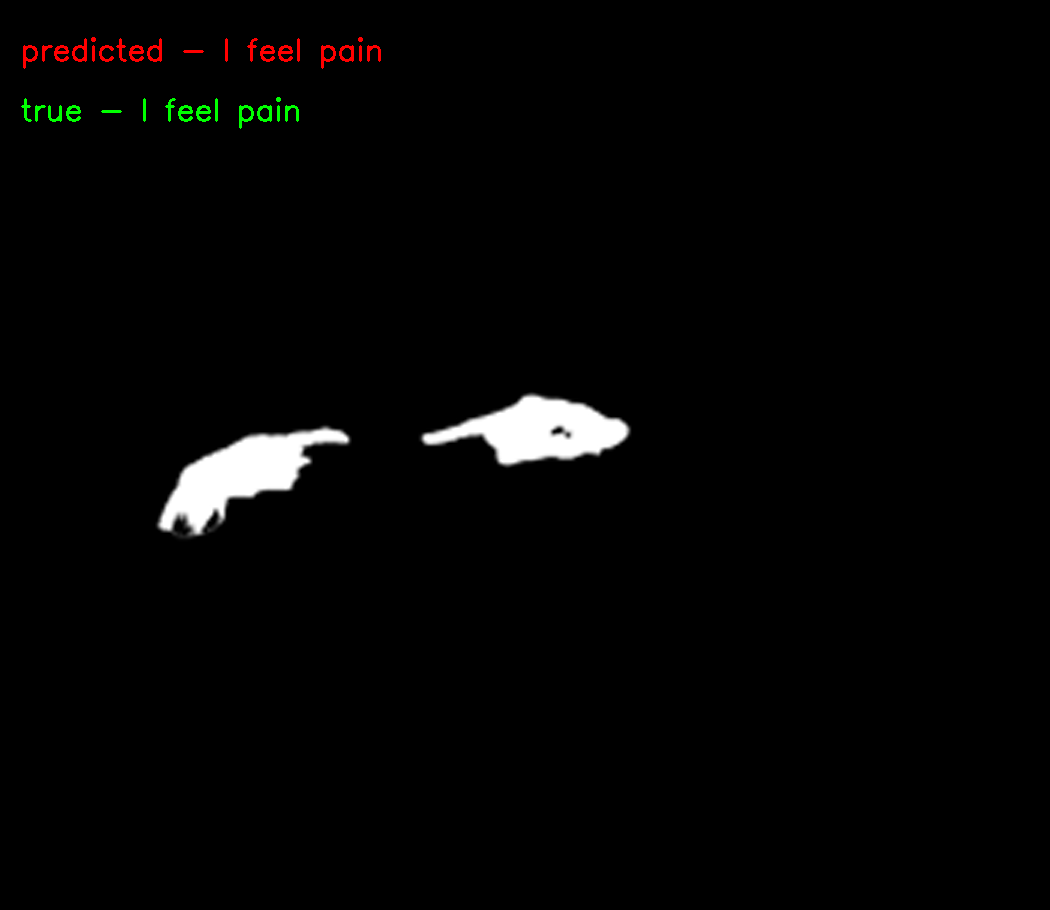

I feel pain


In [0]:
from keras.models import load_model
from keras.optimizers import RMSprop,SGD,Adam
from keras.preprocessing import image
import numpy as np
import os
import cv2
from os import listdir
from os.path import isfile,join
import re
from google.colab.patches import cv2_imshow

def make_test(name,pred,im,true_label):
  BLACK=[0,0,0]
  expanded_image=cv2.copyMakeBorder(im,160,0,0,300,cv2.BORDER_CONSTANT,value=BLACK)
  cv2.putText(expanded_image,"predicted - "+pred,(20,60),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
  cv2.putText(expanded_image,"true - "+true_label,(20,120),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
  cv2_imshow(expanded_image)
  
def getRandomImage(path,img_width,img_height):
  folders=list(filter(lambda x:os.path.isdir(os.path.join(path,x)),os.listdir(path)))
  random_dir=np.random.randint(0,len(folders))
  path_class=folders[random_dir]
  file_path=path+path_class
  file_names=[f for f in listdir(file_path) if isfile(join(file_path,f))]
  random_file_index=np.random.randint(0,len(file_names))
  image_name=file_names[random_file_index]
  final_path=file_path+"/"+image_name
  return image.load_img(final_path,target_size=(img_width,img_height),grayscale=True),final_path,path_class

img_width,img_height=300,300


model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

files=[]
predictions=[]
true_labels=[]


path='/content/ValidationSet/'
img,final_path,true_label=getRandomImage(path,img_width,img_height)
files.append(final_path)
true_labels.append(true_label)
x=image.img_to_array(img)
x=x*1./255
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
classes=model.predict_classes(images,batch_size=batch_size)
predictions.append(classes)
  
  

image=cv2.imread((files[0]))
image=cv2.resize(image,None,fx=3,fy=3, interpolation=cv2.INTER_CUBIC)
make_test("Prediction ",class_labels[predictions[0][0]],image,true_labels[0])
cv2.waitKey(0)
  
cv2.destroyAllWindows()
predictedResult=class_labels[predictions[0][0]]
print(predictedResult)

#Text to Speach

In [0]:
import os
from os.path import exists, join, expanduser

# Clone
name = "deepvoice3_pytorch"
if not exists(name):
  ! git clone https://github.com/r9y9/$name
    
  
# Change working directory to the project dir 
os.chdir(join('/content/', name))

!git checkout 7a10ac6763eda92595e257543494b6a95f64229b --quiet

# Install dependencices
!pip install -q -e '.[bin]'


%pylab inline
! pip install -q librosa nltk

import torch
import numpy as np
import librosa
import librosa.display
import IPython
from IPython.display import Audio
# need this for English text processing frontend
import nltk
! python -m nltk.downloader cmudict





preset = "20180505_deepvoice3_ljspeech.json"
checkpoint_path = "20180505_deepvoice3_checkpoint_step000640000.pth"

if not exists(preset):
  !curl -O -L "https://www.dropbox.com/s/0ck82unm0bo0rxd/20180505_deepvoice3_ljspeech.json"
if not exists(checkpoint_path):
  !curl -O -L "https://www.dropbox.com/s/5ucl9remrwy5oeg/20180505_deepvoice3_checkpoint_step000640000.pth"
  

import hparams
import json

    
# Load parameters from preset
with open(preset) as f:
  hparams.hparams.parse_json(f.read())
  
# Inject frontend text processor
import synthesis
import train
from deepvoice3_pytorch import frontend
synthesis._frontend = getattr(frontend, "en")
train._frontend =  getattr(frontend, "en")

# alises
fs = hparams.hparams.sample_rate
hop_length = hparams.hparams.hop_size

def tts(model, text, p=0, speaker_id=None, fast=True, figures=True):
  from synthesis import tts as _tts
  waveform, alignment, spectrogram, mel = _tts(model, text, p, speaker_id, fast)
  if figures:
      visualize(alignment, spectrogram)
  IPython.display.display(Audio(waveform, rate=fs))
  
def visualize(alignment, spectrogram):
  label_fontsize = 16
  figure(figsize=(16,16))

  subplot(2,1,1)
  imshow(alignment.T, aspect="auto", origin="lower", interpolation=None)
  xlabel("Decoder timestamp", fontsize=label_fontsize)
  ylabel("Encoder timestamp", fontsize=label_fontsize)
  colorbar()

  subplot(2,1,2)
  librosa.display.specshow(spectrogram.T, sr=fs, 
                           hop_length=hop_length, x_axis="time", y_axis="linear")
  xlabel("Time", fontsize=label_fontsize)
  ylabel("Hz", fontsize=label_fontsize)
  tight_layout()
  colorbar()
  
  


Cloning into 'deepvoice3_pytorch'...
remote: Enumerating objects: 1111, done.
remote: Total 1111 (delta 0), reused 0 (delta 0), pack-reused 1111
Receiving objects: 100% (1111/1111), 6.92 MiB | 12.67 MiB/s, done.
Resolving deltas: 100% (617/617), done.
     |████████████████████████████████| 245kB 5.0MB/s 
     |████████████████████████████████| 143kB 45.1MB/s 
     |████████████████████████████████| 225kB 48.3MB/s 
     |████████████████████████████████| 1.7MB 48.6MB/s 
     |████████████████████████████████| 419kB 42.4MB/s 
     |████████████████████████████████| 368kB 44.0MB/s 
Populating the interactive namespace from numpy and matplotlib
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
  % Tot

W0828 10:18:35.508102 140041326647168 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



#Generate Speach


In [0]:
from train import build_model
from train import restore_parts, load_checkpoint

model1 = build_model()
model1 = load_checkpoint(checkpoint_path, model1, None, True)

# Try your favorite senteneces:)
texts = [
 predictedResult   
]

for idx, text in enumerate(texts):
  print(idx, text)
  tts(model1, text, figures=False)
  

Load checkpoint from: 20180505_deepvoice3_checkpoint_step000640000.pth
0 I feel pain


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
